# Thêm thư viện

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [87]:
# Đọc dữ liệu các ngày lễ
df_holidays = pd.read_csv('holidays.csv')
df_holidays.head()

,date,holiday
0,2021-01-01,New Year
1,2021-01-07,Orthodox Christmas
2,2021-01-13,Old New Year
3,2021-01-19,Baptizing - Sacred Epiphany
4,2021-01-25,Students day


In [88]:
# Đọc dữ liệu ngày mua hàng đầu tiên của khách hàng
df_client_first_purchase_date = pd.read_csv('client_first_purchase_date.csv')
df_client_first_purchase_date.head()

,client_id,first_purchase_date
0,1515915625761548908,2022-03-04
1,1515915625638660959,2022-04-06
2,1515915625490249330,2022-03-03
3,1515915625728802311,2021-12-20
4,1515915625915446913,2023-01-16


In [89]:
# Đọc dữ liệu chiến dịch
df_campaigns = pd.read_csv('campaigns.csv')
df_campaigns

,id,campaign_type,channel,topic,started_at,finished_at,total_count,ab_test,warmup_mode,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,NaN,False,NaN,146.0,False,False,True,False,False,False,NaN,NaN
1,64,bulk,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,NaN,False,NaN,97.0,False,False,True,False,False,False,NaN,NaN
2,78,bulk,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080.0,NaN,False,NaN,146.0,False,False,True,False,False,False,NaN,NaN
3,79,bulk,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838.0,NaN,False,NaN,97.0,False,False,True,False,False,False,NaN,NaN
4,89,bulk,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503.0,NaN,False,NaN,109.0,False,True,True,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,179,transactional,email,profile updated,NaN,NaN,NaN,NaN,NaN,NaN,134.0,False,False,False,False,False,False,NaN,NaN
1903,35,transactional,email,order reminder,NaN,NaN,NaN,NaN,NaN,NaN,88.0,False,False,False,False,False,False,NaN,NaN
1904,57,transactional,email,order reminder,NaN,NaN,NaN,NaN,NaN,NaN,88.0,False,False,False,False,False,False,NaN,NaN
1905,56,transactional,email,order reminder,NaN,NaN,NaN,NaN,NaN,NaN,88.0,False,False,False,False,False,False,NaN,NaN


## Dữ liệu nhãn (Ground Truth Feature)

In [ ]:
# Đọc dữ liệu nhãn về các khách hàng "champions"
df_champions_cus = pd.read_csv('message_champions_label.csv')

# Chuyển đổi các cột thời gian sang kiểu datetime
df_champions_cus['opened_first_time_at'] = pd.to_datetime(df_champions_cus['opened_first_time_at'])
df_champions_cus['clicked_first_time_at'] = pd.to_datetime(df_champions_cus['clicked_first_time_at'])

# Tính toán thời gian từ khi khách hàng mở email đến khi nhấp chuột
df_champions_cus['duration'] = (df_champions_cus['clicked_first_time_at'] - df_champions_cus['opened_first_time_at']).dt.total_seconds()
df_champions_cus.head(3)

,id,message_id,campaign_id,campaign_type,client_id,channel,email_provider,stream,platform,date,...,clicked_last_time_at,is_unsubscribed,is_complained,purchased_at,created_at,topic,campaign_start_date,campaign_end_date,campaign_total_count,duration
0,3527260,f5a23ffb-d7a7-4c3e-a7a4-47ec006ec351,29,transactional,1515915625468093649,email,mail.ru,desktop,NaN,2021-04-30,...,2021-04-30 09:03:04,f,f,2021-04-30 09:07:24,2023-04-27 08:55:05.735804000,order cancelled,NaN,NaN,NaN,31.0
1,3526134,70f5e7cb-a40d-4a65-b6b2-68fb7e7bd93b,29,transactional,1515915625561459452,email,mail.ru,desktop,NaN,2021-04-30,...,2021-04-30 06:55:31,f,f,2021-04-30 07:00:33,2023-04-27 08:55:04.145692000,order cancelled,NaN,NaN,NaN,48.0
2,3526485,9ae59692-f304-4b98-a5af-aa710017a974,29,transactional,1515915625616860564,email,mail.ru,desktop,NaN,2021-04-30,...,2021-04-30 08:34:43,f,f,2021-04-30 08:39:10,2023-04-27 08:55:04.640599000,order cancelled,NaN,NaN,NaN,6015.0


## Tính toán các đặc trưng chiến dịch

In [91]:
# Nhóm các khách hàng theo campaign_id và campaign_type, tính số lượng khách hàng cho mỗi nhóm
grouped_df_champions_feature = df_champions_cus.groupby(['campaign_id', 'campaign_type']).client_id.count().reset_index()
grouped_df_champions_feature.rename(columns={'client_id': 'client_count'}, inplace=True)

# Tính tổng số lượng khách hàng
total_clients = grouped_df_champions_feature['client_count'].sum()

# Tính tỷ lệ phần trăm khách hàng trong mỗi nhóm chiến dịch
grouped_df_champions_feature['percentage'] = (grouped_df_champions_feature['client_count'] / total_clients) * 100
grouped_df_champions_feature.head(3)

,campaign_id,campaign_type,client_count,percentage
0,26,transactional,151,1.587635
1,27,transactional,1101,11.576070
2,28,transactional,36,0.378509


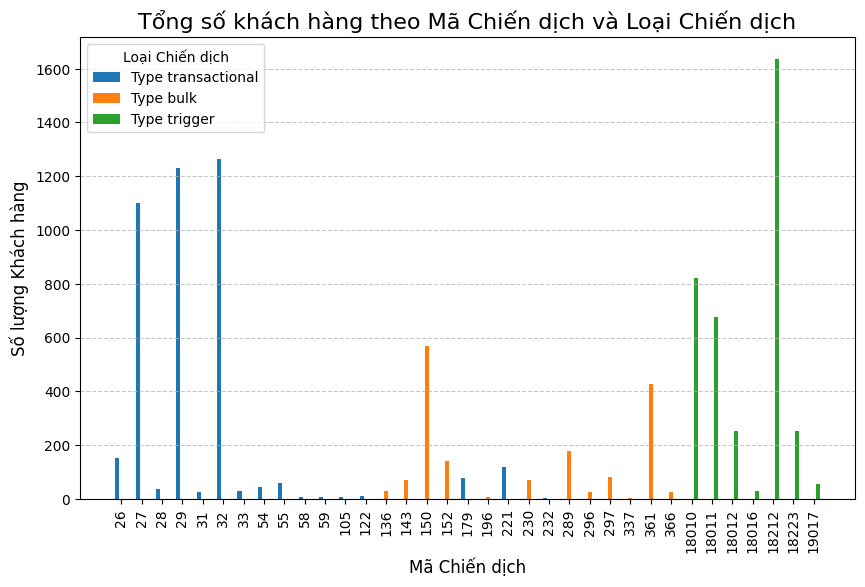

In [92]:
# **Vẽ biểu đồ bar cho số lượng khách hàng theo campaign_id và campaign_type**
# Lấy danh sách các campaign_id và campaign_type
campaign_ids = grouped_df_champions_feature['campaign_id'].unique()
campaign_types = grouped_df_champions_feature['campaign_type'].unique()

# Vẽ biểu đồ bar cho số lượng khách hàng theo từng chiến dịch và loại chiến dịch
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Độ rộng thanh bar
x = range(len(campaign_ids))  # Vị trí của các thanh trên trục x
for i, campaign_type in enumerate(campaign_types):
    # Lọc các chiến dịch theo loại
    subset = grouped_df_champions_feature[grouped_df_champions_feature['campaign_type'] == campaign_type]
    positions = [campaign_ids.tolist().index(cid) for cid in subset['campaign_id']]
    # Vẽ biểu đồ bar
    ax.bar(
        [p + i * width for p in positions], 
        subset['client_count'], 
        width=width, 
        label=f'Type {campaign_type}'
    )

# Cài đặt các thông số cho biểu đồ
ax.set_xticks([p + width * (len(campaign_types) - 1) / 2 for p in x])
ax.set_xticklabels(campaign_ids, rotation=90, ha='center')
ax.set_title('Tổng số khách hàng theo Mã Chiến dịch và Loại Chiến dịch', fontsize=16)
ax.set_xlabel('Mã Chiến dịch', fontsize=12)
ax.set_ylabel('Số lượng Khách hàng', fontsize=12)
ax.legend(title='Loại Chiến dịch')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Chiến dịch trigger (Xanh lá cây) có hiệu quả cao nhất, đặc biệt ở mã 18012 và 18013.
Chiến dịch transactional (Xanh dương) chiếm ưu thế ở một số mã như 26, 28.
Chiến dịch bulk (Cam) hiệu quả thấp, số lượng khách hàng tham gia ít.

Trigger campaigns: Hiệu quả nhất, nên tập trung phát triển.
Bulk campaigns: Cần phân tích sâu hơn để cải thiện.
Transactional campaigns: Tối ưu hóa nội dung và thời gian.

## Danh sách các campaign_id và campaign_type sử dụng: 
Các chiến dịch dưới đây có thể được liên kết với các hành vi người dùng theo từng loại chiến dịch (dựa trên các chủ đề của chiến dịch):
- trigger + 18212
- transactional + 32
- transactional + 29
- transactional + 27
- trigger + 18010
- trigger + 18011
- bulk + 150

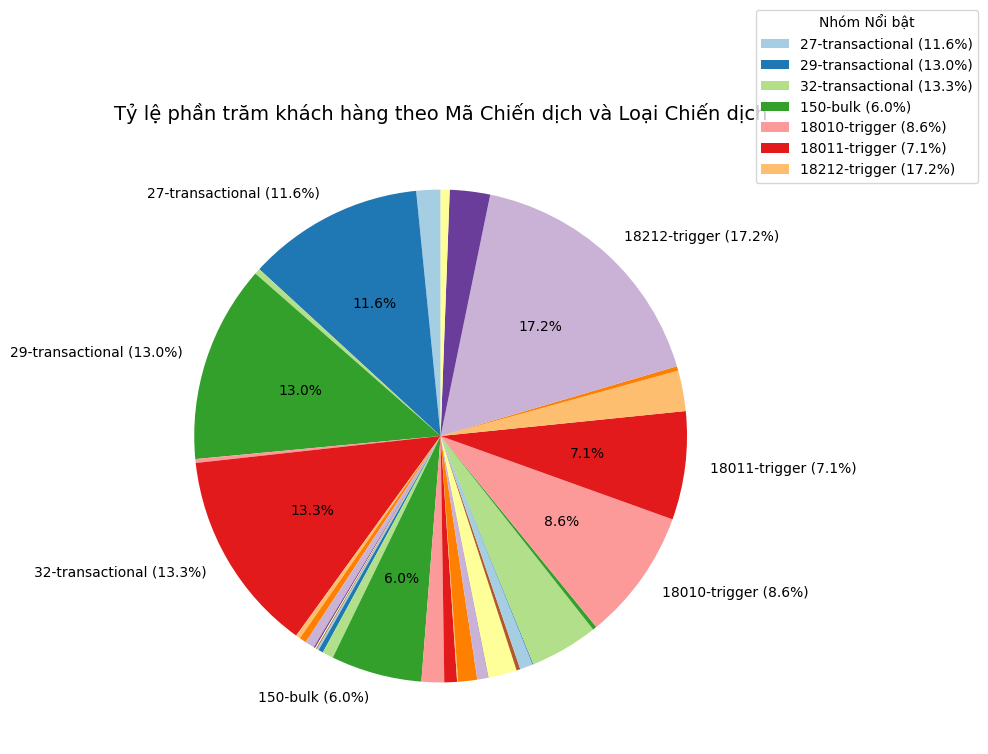

In [93]:
# **Danh sách các chiến dịch với campaign_id và campaign_type nổi bật**
# Các chiến dịch này có thể được liên kết với các hành vi người dùng theo từng loại chiến dịch
labels = grouped_df_champions_feature.apply(
    lambda row: f"{row['campaign_id']}-{row['campaign_type']} ({row['percentage']:.1f}%)" 
    if row['percentage'] > 5 else "", 
    axis=1
)

highlighted_labels = grouped_df_champions_feature[grouped_df_champions_feature['percentage'] > 5].apply(
    lambda row: f"{row['campaign_id']}-{row['campaign_type']} ({row['percentage']:.1f}%)", axis=1
)

# **Vẽ biểu đồ hình tròn (pie chart) cho tỷ lệ phần trăm khách hàng theo chiến dịch**
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    grouped_df_champions_feature['percentage'],
    labels=labels,           
    autopct=lambda pct: f"{pct:.1f}%" if pct > 5 else "",  
    startangle=90,        
    colors=plt.cm.Paired.colors 
)

# Hiển thị chú thích cho các chiến dịch nổi bật
plt.legend(
    wedges,  
    highlighted_labels, 
    title="Nhóm Nổi bật",  
    loc='best',
    fontsize=10,  
    bbox_to_anchor=(1, 0.9)  
)

plt.title('Tỷ lệ phần trăm khách hàng theo Mã Chiến dịch và Loại Chiến dịch', fontsize=14)

plt.show()

Chiến dịch nổi bật:
18212-trigger (17.2%): Hiệu quả cao nhất.
32-transactional (13.3%) và 29-transactional (13.0%): Chiếm tỷ lệ lớn.
18010-trigger (8.6%) và 18011-trigger (7.1%): Hiệu quả tốt.

Loại chiến dịch:
Trigger campaigns: Hiệu quả nhất.
Transactional campaigns: Vẫn giữ vai trò quan trọng.
Bulk campaigns: Hiệu quả thấp hơn, chỉ có 150-bulk (6.0%) nổi bật.
Phân phối không đồng đều: Chiến dịch hiệu quả tập trung vào một số ít mã.

Tăng cường trigger campaigns: Đầu tư vào loại chiến dịch hiệu quả nhất.
Duy trì transactional campaigns: Tối ưu để tiếp tục phát huy vai trò quan trọng.
Cải thiện bulk campaigns: Điều chỉnh nội dung và đối tượng mục tiêu.
Tối ưu chiến dịch nhỏ: Phân tích để cải thiện hoặc loại bỏ các chiến dịch dưới 5%.

In [94]:
# **Danh sách các chiến dịch có tỷ lệ phần trăm khách hàng cao nhất**
top_campaigns = grouped_df_champions_feature.sort_values(by='percentage', ascending=False).head(7)
top_campaign_ids_types = list(zip(top_campaigns['campaign_id'], top_campaigns['campaign_type']))
top_campaign_ids_types

[(18212, 'trigger'),
 (32, 'transactional'),
 (29, 'transactional'),
 (27, 'transactional'),
 (18010, 'trigger'),
 (18011, 'trigger'),
 (150, 'bulk')]

### Duration Feature

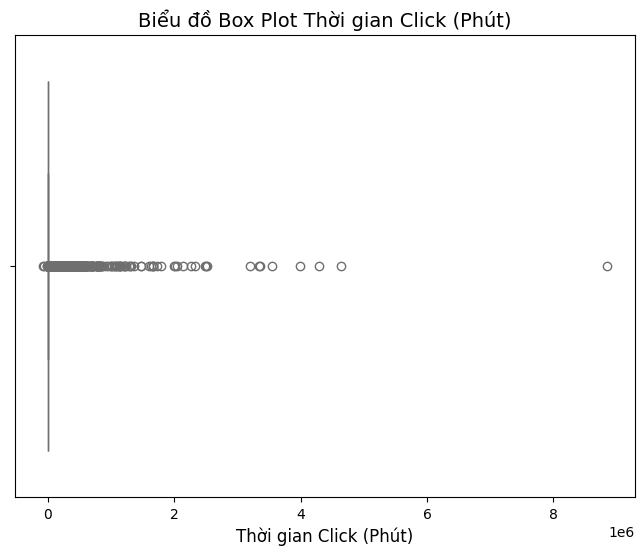

In [95]:
# **Biểu đồ Box Plot Thời gian Click (Duration)**
# Vẽ biểu đồ box plot để quan sát sự phân bố của thời gian click (duration)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_champions_cus['duration'], color='skyblue')

plt.title('Biểu đồ Box Plot Thời gian Click (Phút)', fontsize=14)
plt.xlabel('Thời gian Click (Phút)', fontsize=12)

plt.show()

Cấu trúc biểu đồ:
Hộp (Box): Biểu thị phân phối dữ liệu với Q1 (Quartile 1), Q3 (Quartile 3), và Median (trung vị).
Whiskers (Râu hộp): Thể hiện phạm vi phần lớn dữ liệu.

Điểm ngoại lai (Outliers):
Có nhiều điểm ngoại lai nằm ngoài râu hộp.
Những giá trị này cho thấy "Thời gian Click" rất lớn so với phần lớn dữ liệu, cần kiểm tra thêm.

Phân phối dữ liệu:
Phần lớn giá trị gần 0: Nhiều người dùng thực hiện click trong thời gian ngắn.
Số lượng giá trị lớn đáng kể: Phản ánh các trường hợp kéo dài thời gian click hoặc ngoại lệ.

### Sử dụng IQR để xử lý outlier

In [96]:
# Tính toán các giá trị Q1 (25th percentile) và Q3 (75th percentile) và IQR (Interquartile Range)
Q1 = df_champions_cus['duration'].quantile(0.25)
Q3 = df_champions_cus['duration'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai dựa trên IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị thời gian click không phải là ngoại lai
df_filtered_duration = df_champions_cus[(df_champions_cus['duration'] >= lower_bound) & (df_champions_cus['duration'] <= upper_bound)]

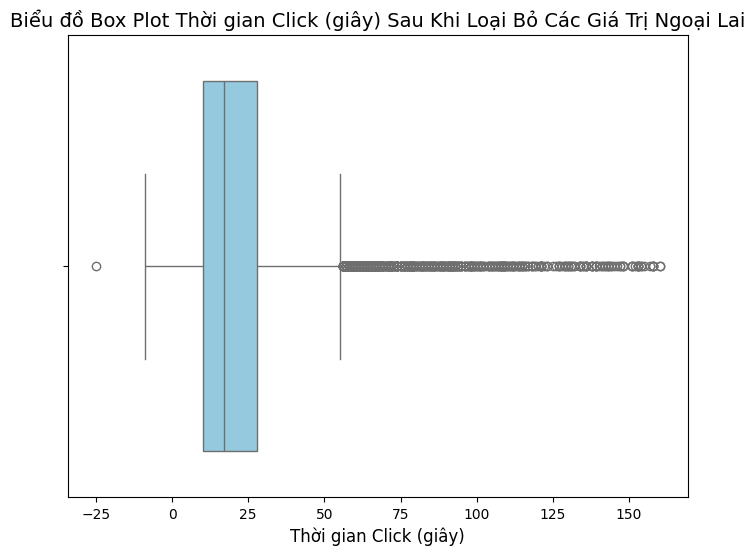

In [97]:
# Tính toán số lượng và tỷ lệ phần trăm các giá trị ngoại lai bị loại bỏ
outliers_removed = len(df_champions_cus) - len(df_filtered_duration)
outlier_ratio = outliers_removed / len(df_champions_cus) * 100

# **Vẽ lại biểu đồ Box Plot sau khi loại bỏ ngoại lai**
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered_duration['duration'], color='skyblue')

plt.title('Biểu đồ Box Plot Thời gian Click (giây) Sau Khi Loại Bỏ Các Giá Trị Ngoại Lai', fontsize=14)
plt.xlabel('Thời gian Click (giây)', fontsize=12)

plt.show()

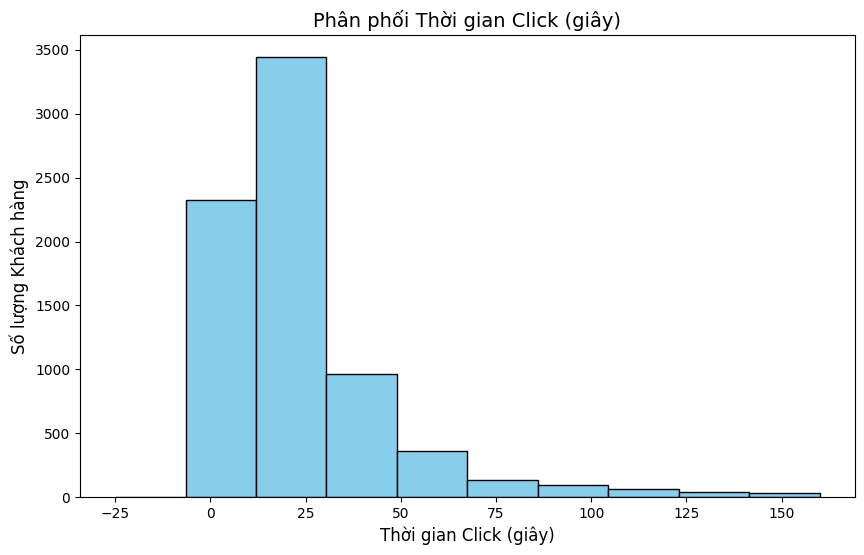

In [98]:
# **Vẽ biểu đồ phân phối (Histogram) của thời gian click**
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_duration['duration'], bins=10, edgecolor='black', color='skyblue')

plt.title('Phân phối Thời gian Click (giây)', fontsize=14)
plt.xlabel('Thời gian Click (giây)', fontsize=12)
plt.ylabel('Số lượng Khách hàng', fontsize=12)

plt.show()

Tập trung thời gian click ngắn:
Phần lớn khách hàng (hơn 3,500) nhấp chuột trong 0-25 giây đầu tiên.
Giảm dần theo thời gian:
Số lượng khách hàng giảm mạnh sau 25 giây, rất ít khách hàng nhấp chuột sau 50 giây.

Dạng phân phối: Lệch trái, tập trung ở thời gian click ngắn.

Hành vi khách hàng: Phản hồi nhanh chóng, click chủ yếu trong 25 giây đầu.
Tối ưu hóa nội dung email: Tập trung vào tiêu đề hấp dẫn và lời kêu gọi hành động (CTA) trong khoảng thời gian đầu.
Phân tích nhóm chậm phản hồi: Hiểu rõ hành vi để cải thiện chiến dịch.

### Phân phối dữ liệu duration for champions customer

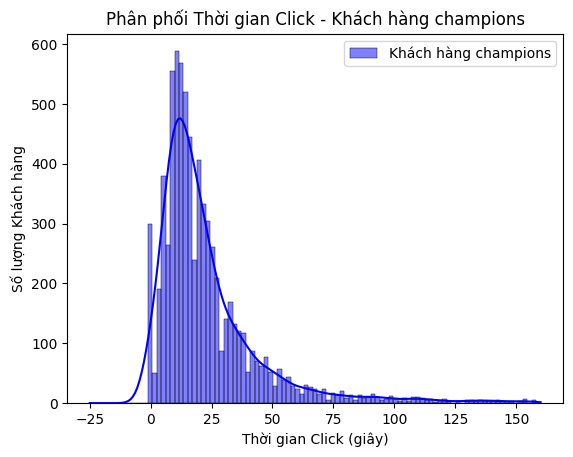

In [99]:
sns.histplot(df_filtered_duration['duration'], kde=True, color='blue', label='Khách hàng champions')
plt.title("Phân phối Thời gian Click - Khách hàng champions")
plt.xlabel("Thời gian Click (giây)")
plt.ylabel("Số lượng Khách hàng")
plt.legend()
plt.show()

#### Nhận xét về biểu đồ:
1. Phân phối dữ liệu:

- Biểu đồ có hình dạng của một phân phối đỉnh nhọn (right-skewed), nghĩa là phần lớn khách hàng thực hiện click trong khoảng thời gian ngắn (dưới 25 phút).
- Phân phối có một đỉnh cao ở gần 0 phút, cho thấy hầu hết khách hàng tiềm năng thực hiện click ngay sau khi nhận được thông báo.
- Dữ liệu có một đuôi dài (tail) kéo dài sang phải, có thể là do một số khách hàng tiềm năng thực hiện click sau một khoảng thời gian khá dài (hơn 100 phút), nhưng số lượng này ít.
2. Các giá trị tiêu cực (Negative Values):

- Biểu đồ xuất hiện các giá trị âm (dưới -25 phút), điều này không thực tế trong trường hợp "thời gian click". Đây có thể là lỗi trong quá trình thu thập dữ liệu, cần phải kiểm tra và loại bỏ các giá trị này nếu chúng không hợp lý.
3. Độ phân tán (Dispersion):

- Phân phối này có sự phân tán lớn, với hầu hết khách hàng thực hiện click nhanh, nhưng vẫn có một số khách hàng "chậm" hơn, thực hiện click sau khoảng thời gian dài hơn.

## Phân khúc khách hàng tiềm năng (Potential Customers)

In [100]:
# Đọc dữ liệu khách hàng tiềm năng
df_potential_cus = pd.read_csv('message_potential.csv')
df_potential_cus['opened_first_time_at'] = pd.to_datetime(df_potential_cus['opened_first_time_at'])
df_potential_cus['clicked_first_time_at'] = pd.to_datetime(df_potential_cus['clicked_first_time_at'])
# Tính toán thời gian giữa việc mở email và nhấp chuột
df_potential_cus['duration'] = (df_potential_cus['clicked_first_time_at'] - df_potential_cus['opened_first_time_at']).dt.total_seconds()
df_potential_cus.head(3)

,id,message_id,campaign_id,campaign_type,client_id,channel,email_provider,stream,platform,date,...,clicked_last_time_at,is_unsubscribed,is_complained,purchased_at,created_at,topic,campaign_start_date,campaign_end_date,campaign_total_count,duration
0,3527267,f659ab73-fa2c-4ba3-b8d6-8d5a64750520,29,transactional,1515915625490188270,email,gmail.com,desktop,NaN,2021-04-30,...,2021-04-30 14:20:50,f,f,NaN,2023-04-27 08:55:05.747874000,order cancelled,NaN,NaN,NaN,21.0
1,3527287,f9004f5a-20d9-49ad-b0b7-ed12535f2a92,29,transactional,1515915625555693291,email,mail.ru,desktop,NaN,2021-04-30,...,2021-04-30 19:05:23,f,f,NaN,2023-04-27 08:55:05.777527000,order cancelled,NaN,NaN,NaN,22.0
2,3527338,ff555835-5889-49b7-8e38-636cc4d48869,29,transactional,1515915625566854839,email,yandex.ru,desktop,NaN,2021-04-30,...,2021-04-30 06:39:28,f,f,NaN,2023-04-27 08:55:05.850435000,order cancelled,NaN,NaN,NaN,6.0


## Sử dụng IQR để loại bỏ giá trị ngoại lai cho khách hàng tiềm năng

In [101]:
Q1 = df_potential_cus['duration'].quantile(0.25)
Q3 = df_potential_cus['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị ngoại lai cho khách hàng tiềm năng
df_potential_filtered_duration = df_potential_cus[(df_potential_cus['duration'] >= lower_bound) & (df_potential_cus['duration'] <= upper_bound)]

## Tính toán thời gian click trung bình cho mỗi khách hàng tiềm năng

In [102]:
avg_time_to_click = df_potential_filtered_duration.groupby('client_id')['duration'].mean().reset_index(name='avg_time_to_click')
avg_time_to_click.head(3)

,client_id,avg_time_to_click
0,1515915625468060730,31.666667
1,1515915625468060792,17.000000
2,1515915625468060816,2.000000


- Xác định khách hàng tiềm năng: Dựa trên hành vi của nhóm khách hàng champions, quy trình tìm ra các khách hàng tiềm năng tham gia vào những chiến dịch tương tự nhưng chưa thực hiện giao dịch mua hàng. Việc này giúp tạo ra một nhóm đối tượng có khả năng chuyển đổi cao.

- Lọc ra các khách hàng tiềm năng tham gia ít nhất 2 chiến dịch, từ đó xác định nhóm khách hàng có mức độ tương tác cao.

In [103]:
# **Lọc các khách hàng tiềm năng theo chiến dịch top**
df_top_clients_potential = df_potential_cus[df_potential_cus.apply(lambda row: (row['campaign_id'], row['campaign_type']) in top_campaign_ids_types, axis=1)]
df_top_clients_potential_unique = df_top_clients_potential.drop_duplicates(subset=['client_id', 'campaign_id', 'campaign_type'])

# Tính số lượng chiến dịch mà mỗi khách hàng tiềm năng tham gia
client_potential_counts = df_top_clients_potential_unique.groupby('client_id').size().reset_index(name='campaign_count')
client_potential_counts_filtered = client_potential_counts[client_potential_counts['campaign_count'] >= 2]

## Kết hợp thông tin về khách hàng tiềm năng với thời gian click trung bình

In [104]:
client_potential_info = pd.merge(client_potential_counts_filtered, avg_time_to_click, on='client_id', how='inner')
len(client_potential_info)

7586

## Phân phối dữ liệu Thời gian Click cho Khách hàng Tiềm năng

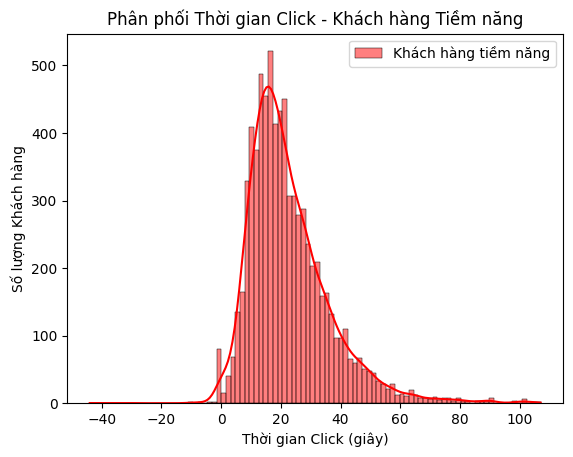

In [105]:
# Vẽ biểu đồ phân phối (histogram) và đường chuẩn (KDE) của thời gian click cho khách hàng tiềm năng
sns.histplot(client_potential_info['avg_time_to_click'], kde=True, color='red', label='Khách hàng tiềm năng')
plt.title("Phân phối Thời gian Click - Khách hàng Tiềm năng")
plt.xlabel("Thời gian Click (giây)")
plt.ylabel("Số lượng Khách hàng")
plt.legend()
plt.show()

Tập trung thời gian click ngắn (10-25 giây): Đỉnh cao nhất tại khoảng 20 giây, phản ánh số lượng khách hàng tiềm năng cao nhất.
Giảm dần sau 50 giây: Số lượng khách hàng rất ít, cho thấy phản hồi giảm rõ rệt.

Phân phối lệch trái: Thời gian click ngắn chiếm ưu thế, với một số ít khách hàng phản hồi muộn hơn.

Hiệu quả phản hồi: Phần lớn khách hàng tiềm năng phản hồi nhanh trong 10-25 giây.
Tối ưu hóa chiến dịch: Thiết kế email tập trung vào nội dung hấp dẫn trong khoảng thời gian click phổ biến.
Phân tích nhóm phản hồi chậm: Tìm hiểu lý do phản hồi sau 50 giây để cải thiện chiến lược.

## So sánh phân phối Thời gian Click giữa Khách hàng champions và Khách hàng Tiềm năng

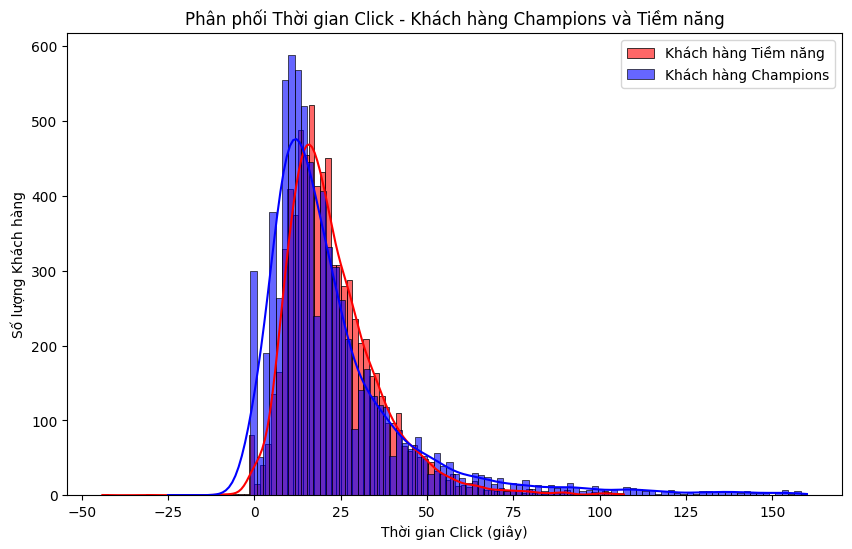

In [106]:
# Vẽ biểu đồ phân phối (histogram) với đường chuẩn (KDE) cho cả khách hàng champions và khách hàng tiềm năng
plt.figure(figsize=(10, 6))

sns.histplot(client_potential_info['avg_time_to_click'], kde=True, color='red', label='Khách hàng Tiềm năng', alpha=0.6)
sns.histplot(df_filtered_duration['duration'], kde=True, color='blue', label='Khách hàng Champions', alpha=0.6)

plt.title("Phân phối Thời gian Click - Khách hàng Champions và Tiềm năng")
plt.xlabel("Thời gian Click (giây)")
plt.ylabel("Số lượng Khách hàng")

plt.legend()
plt.show()

Biểu đồ phân phối thời gian click của Khách hàng Tiềm năng và Khách hàng Khác cho thấy một số điểm tương quan và khác biệt:

- Tương đồng về hành vi:
Cả hai nhóm đều có xu hướng click nhanh (trong khoảng 0-20 phút), cho thấy cả hai nhóm đều phản ứng nhanh với các chiến dịch.
- Khác biệt về mức độ phân tán:
Khách hàng Tiềm năng tập trung chủ yếu vào thời gian click ngắn, cho thấy họ dễ bị thu hút và hành động nhanh chóng.
Khách hàng Khác có phân tán thời gian click rộng hơn, cho thấy họ có thể mất nhiều thời gian hơn để đưa ra quyết định, hoặc ít quan tâm đến chiến dịch hơn.
#### ***Kết luận:***
- Tương đồng: Cả hai nhóm đều có hành vi click nhanh ở đầu, nhưng Khách hàng Tiềm năng ít phân tán hơn trong thời gian click.
- Khác biệt: Khách hàng Tiềm năng dễ hành động hơn, trong khi Khách hàng Khác có thể cần thêm thời gian hoặc động lực.


## Tính toán Mật độ phân phối Thời gian Click của Khách hàng Tiềm năng

In [107]:
# Lọc dữ liệu để loại bỏ các giá trị thời gian click <= 0
temp = df_filtered_duration[df_filtered_duration['duration'] > 0]

# Tính toán histogram của thời gian click sau khi lọc
np.histogram(temp['duration'], bins=30, density=True)

(array([0.016345  , 0.03709259, 0.03482539, 0.03139821, 0.01779495,
        0.01101969, 0.01041334, 0.00611619, 0.00456078, 0.00361172,
        0.00292628, 0.00181904, 0.00160814, 0.00131814, 0.00100179,
        0.00073816, 0.0009227 , 0.00073816, 0.00060635, 0.00039544,
        0.00076452, 0.00039544, 0.00034272, 0.0002109 , 0.00028999,
        0.00036908, 0.00036908, 0.00018454, 0.00028999, 0.0002109 ]),
 array([  1. ,   6.3,  11.6,  16.9,  22.2,  27.5,  32.8,  38.1,  43.4,
         48.7,  54. ,  59.3,  64.6,  69.9,  75.2,  80.5,  85.8,  91.1,
         96.4, 101.7, 107. , 112.3, 117.6, 122.9, 128.2, 133.5, 138.8,
        144.1, 149.4, 154.7, 160. ]))

## Tính toán KL Divergence
Đoạn mã dưới đây sử dụng KL Divergence (Kullback-Leibler Divergence) để đo lường sự khác biệt giữa hai phân phối xác suất. Cụ thể, chúng ta tính toán KL Divergence giữa phân phối thời gian click của hai nhóm khách hàng:

- Khách hàng Tiềm Năng: Dữ liệu về thời gian click của các khách hàng tiềm năng.
- Khách hàng Khác: Dữ liệu về thời gian click của các khách hàng không thuộc nhóm tiềm năng.

In [108]:
from scipy.stats import entropy

# Lọc dữ liệu để loại bỏ các giá trị ngoại lai và chỉ giữ các giá trị thời gian click hợp lệ
df_filtered_duration_enhance = df_filtered_duration[(df_filtered_duration['duration'] > 0) & (df_filtered_duration['duration'] < 100)]
client_potential_info_enhance = client_potential_info[(client_potential_info['avg_time_to_click'] > 0) & (client_potential_info['avg_time_to_click'] < 100)]

# Tính toán histogram của dữ liệu thời gian click cho khách hàng champions và tiềm năng
hist_potential, bins_potential = np.histogram(df_filtered_duration_enhance['duration'], bins=30, density=True)
hist_other, bins_other = np.histogram(client_potential_info_enhance['avg_time_to_click'], bins=30, density=True)

# Tính toán KL Divergence giữa phân phối thời gian click của khách hàng champions và khách hàng tiềm năng
kl_divergence = entropy(hist_potential + 1e-10, hist_other + 1e-10)  
print(f"KL Divergence between the two distributions: {kl_divergence}")

KL Divergence between the two distributions: 0.12693732235294566


Kết quả KL Divergence:
- KL Divergence = 0.1269 ở khoảng thời gian click từ 0 - 100 cho thấy rằng phân phối thời gian click giữa hai nhóm khách hàng có sự khác biệt nhưng không quá lớn.
- Giá trị KL Divergence càng nhỏ có nghĩa là hai phân phối càng giống nhau. Trong trường hợp này, giá trị 0.1269 cho thấy sự khác biệt khá nhỏ, cho thấy hành vi thời gian click của hai nhóm khách hàng có sự tương đồng nhất định.

In [109]:
len(set(client_potential_info_enhance['client_id']))

7485

## So sánh phân phối Thời gian Click giữa Khách hàng Tiềm năng và Khách hàng Khác

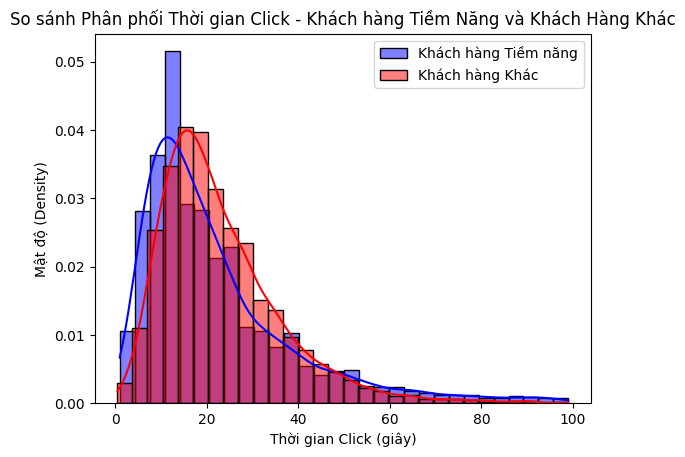

In [110]:
# Vẽ biểu đồ so sánh phân phối thời gian click giữa khách hàng tiềm năng và khách hàng khác
sns.histplot(df_filtered_duration_enhance['duration'], kde=True, color='blue', label='Khách hàng Tiềm năng', stat='density', bins=30)
sns.histplot(client_potential_info_enhance['avg_time_to_click'], kde=True, color='red', label='Khách hàng Khác', stat='density', bins=30)

plt.title("So sánh Phân phối Thời gian Click - Khách hàng Tiềm Năng và Khách Hàng Khác")
plt.xlabel("Thời gian Click (giây)")
plt.ylabel("Mật độ (Density)")

plt.legend()
plt.show()

Tập trung thời gian click (10-25 giây):
Cả hai nhóm phản hồi nhanh nhất trong khoảng này, với đỉnh phân phối gần 20 giây.

So sánh hai nhóm:
Khách hàng Tiềm năng (màu xanh): Phân phối tập trung hơn, phản hồi nhanh hơn.
Khách hàng Khác (màu đỏ): Phân phối rộng hơn, một số phản hồi chậm hơn (trên 50 giây).

Tương đồng: Cả hai nhóm có xu hướng phản hồi nhanh chóng ở thời gian ngắn.

Hiệu quả của nhóm khách hàng tiềm năng: Phản hồi nhanh và tập trung, chứng tỏ nội dung email hiệu quả với họ.
Tối ưu hóa chiến dịch:
Tăng cường thiết kế nội dung thu hút nhóm khách hàng tiềm năng.
Cá nhân hóa nội dung và chiến lược cho nhóm khách hàng khác để tăng tỷ lệ click.
Phân đoạn chiến lược: Nhóm khách hàng phản hồi chậm cần chiến lược tiếp cận khác biệt.